In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_absolute_error, make_scorer

In [2]:
df = pd.read_csv('./data/2020/df_mol2vec.csv')
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,pdbcode,affinity
0,-33.215520,-4.911912,-58.069412,-21.501130,86.036830,-48.711243,-163.09206,-56.392216,177.12903,-0.203314,...,118.41117,87.59636,-135.84192,-56.251205,12.598450,-148.720890,-178.94377,-31.278870,3zzf,0.40
1,-49.548927,-5.533656,-78.656740,11.228692,96.537285,-45.226390,-198.04187,-50.896503,194.37296,13.702780,...,160.35870,97.12160,-164.78786,-62.422604,18.535614,-147.918760,-208.95258,-46.084557,3gww,0.45
2,-23.400223,-7.932979,-35.621426,-2.120256,59.704235,-22.519524,-114.47008,-34.282997,111.38798,7.034303,...,94.77718,61.17864,-83.11074,-31.502813,7.987552,-95.268074,-120.75750,-28.159447,1w8l,0.49
3,-26.764908,-7.937400,-49.278860,-9.648706,69.367480,-31.425886,-146.40346,-37.342216,129.86770,14.527238,...,105.85985,69.64447,-126.76569,-49.138590,1.389015,-115.341490,-158.34018,-35.511227,3fqa,0.49
4,-33.097664,-24.753980,-71.645750,17.423645,76.952320,-45.259354,-184.55115,-47.502502,176.07903,4.592343,...,142.47672,75.98463,-151.25670,-62.206776,0.313482,-147.893430,-202.49968,-42.562164,1zsb,0.60


## Analysis

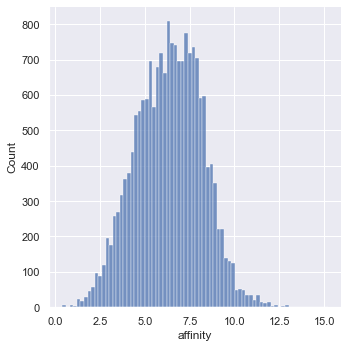

In [6]:
sns.set_theme();
ax = sns.displot(df['affinity'])

## Preparation

In [24]:
y = df.affinity
x = df.drop(columns = ['affinity']).copy()
#x = df.drop(columns = ['pdbcode', 'affinity']).copy()

In [25]:
x_train, x_rem, y_train, y_rem = train_test_split(x, y, train_size=0.7)
x_val, x_test, y_val, y_test = train_test_split(x_rem, y_rem, test_size=0.33)

In [26]:
code_train = x_train.pdbcode.copy()
code_val = x_val.pdbcode.copy()
code_test = x_test.pdbcode.copy()

In [27]:
x_train.drop(columns = ['pdbcode'], inplace = True)
x_val.drop(columns = ['pdbcode'], inplace = True)
x_test.drop(columns = ['pdbcode'], inplace = True)

In [28]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9)

## RandomForest

In [29]:
model = RandomForestRegressor(random_state=0, n_estimators = 200)
model

RandomForestRegressor(n_estimators=200, random_state=0)

In [30]:
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [31]:
pred = model.predict(x_val)

In [32]:
mean_absolute_error(pred, y_val)

1.1210306473605016

## Prediction analysis

In [22]:
df_val = pd.DataFrame({'code' : code_val, 
                      'affinity' : y_val,
                      'prediction' : pred})
df_val.sort_values(by = 'affinity', inplace = True)

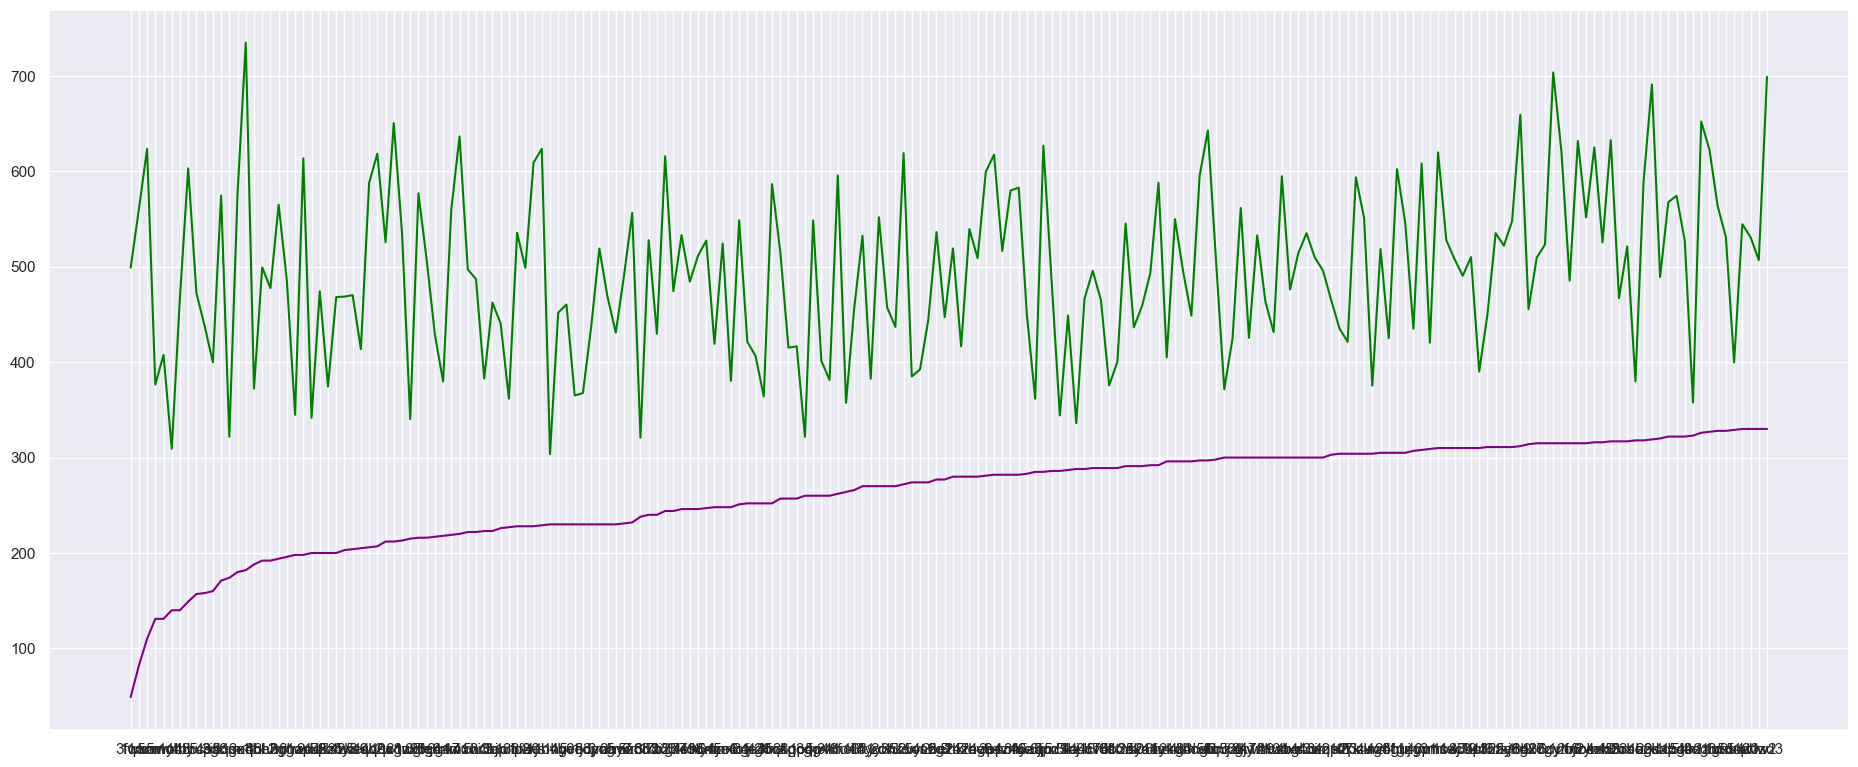

In [23]:
fig = plt.figure(figsize=(20, 8),dpi=100)
ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.plot(df_val.code[:200], df_val.affinity[:200], color = 'purple')
ax.plot(df_val.code[:200], df_val.prediction[:200], color = 'green')